In [141]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("data_cleaning/final-cleaned-monthly-data.csv")
data.head()

,numberOfPeople,numberOfChildren,squareMeters,homeType,ELECTRIC_VEHICLE,TV,DISH_WASHER,ELECTRIC_HEATING,SAUNA,CABLE_BOX,COFFEE_MACHINE,TUMBLE_DRYER,FREEZER,HOB,WASHING_MACHINE,GAME_CONSOLE,REFRIGERATOR,TOASTER,HOME_BATTERY,MICROWAVE,IRON,GRILL,COMPUTER,OVEN,ELECTRIC_SHOWER,KETTLE,energy
0,2.0,1.0,102.0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,933.178402
1,1.0,0.0,54.0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,202.805462
2,1.0,0.0,65.0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,456.958548
3,3.0,0.0,120.0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,859.969335
4,1.0,0.0,70.0,1,0,2,1,1,0,2,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,347.795414


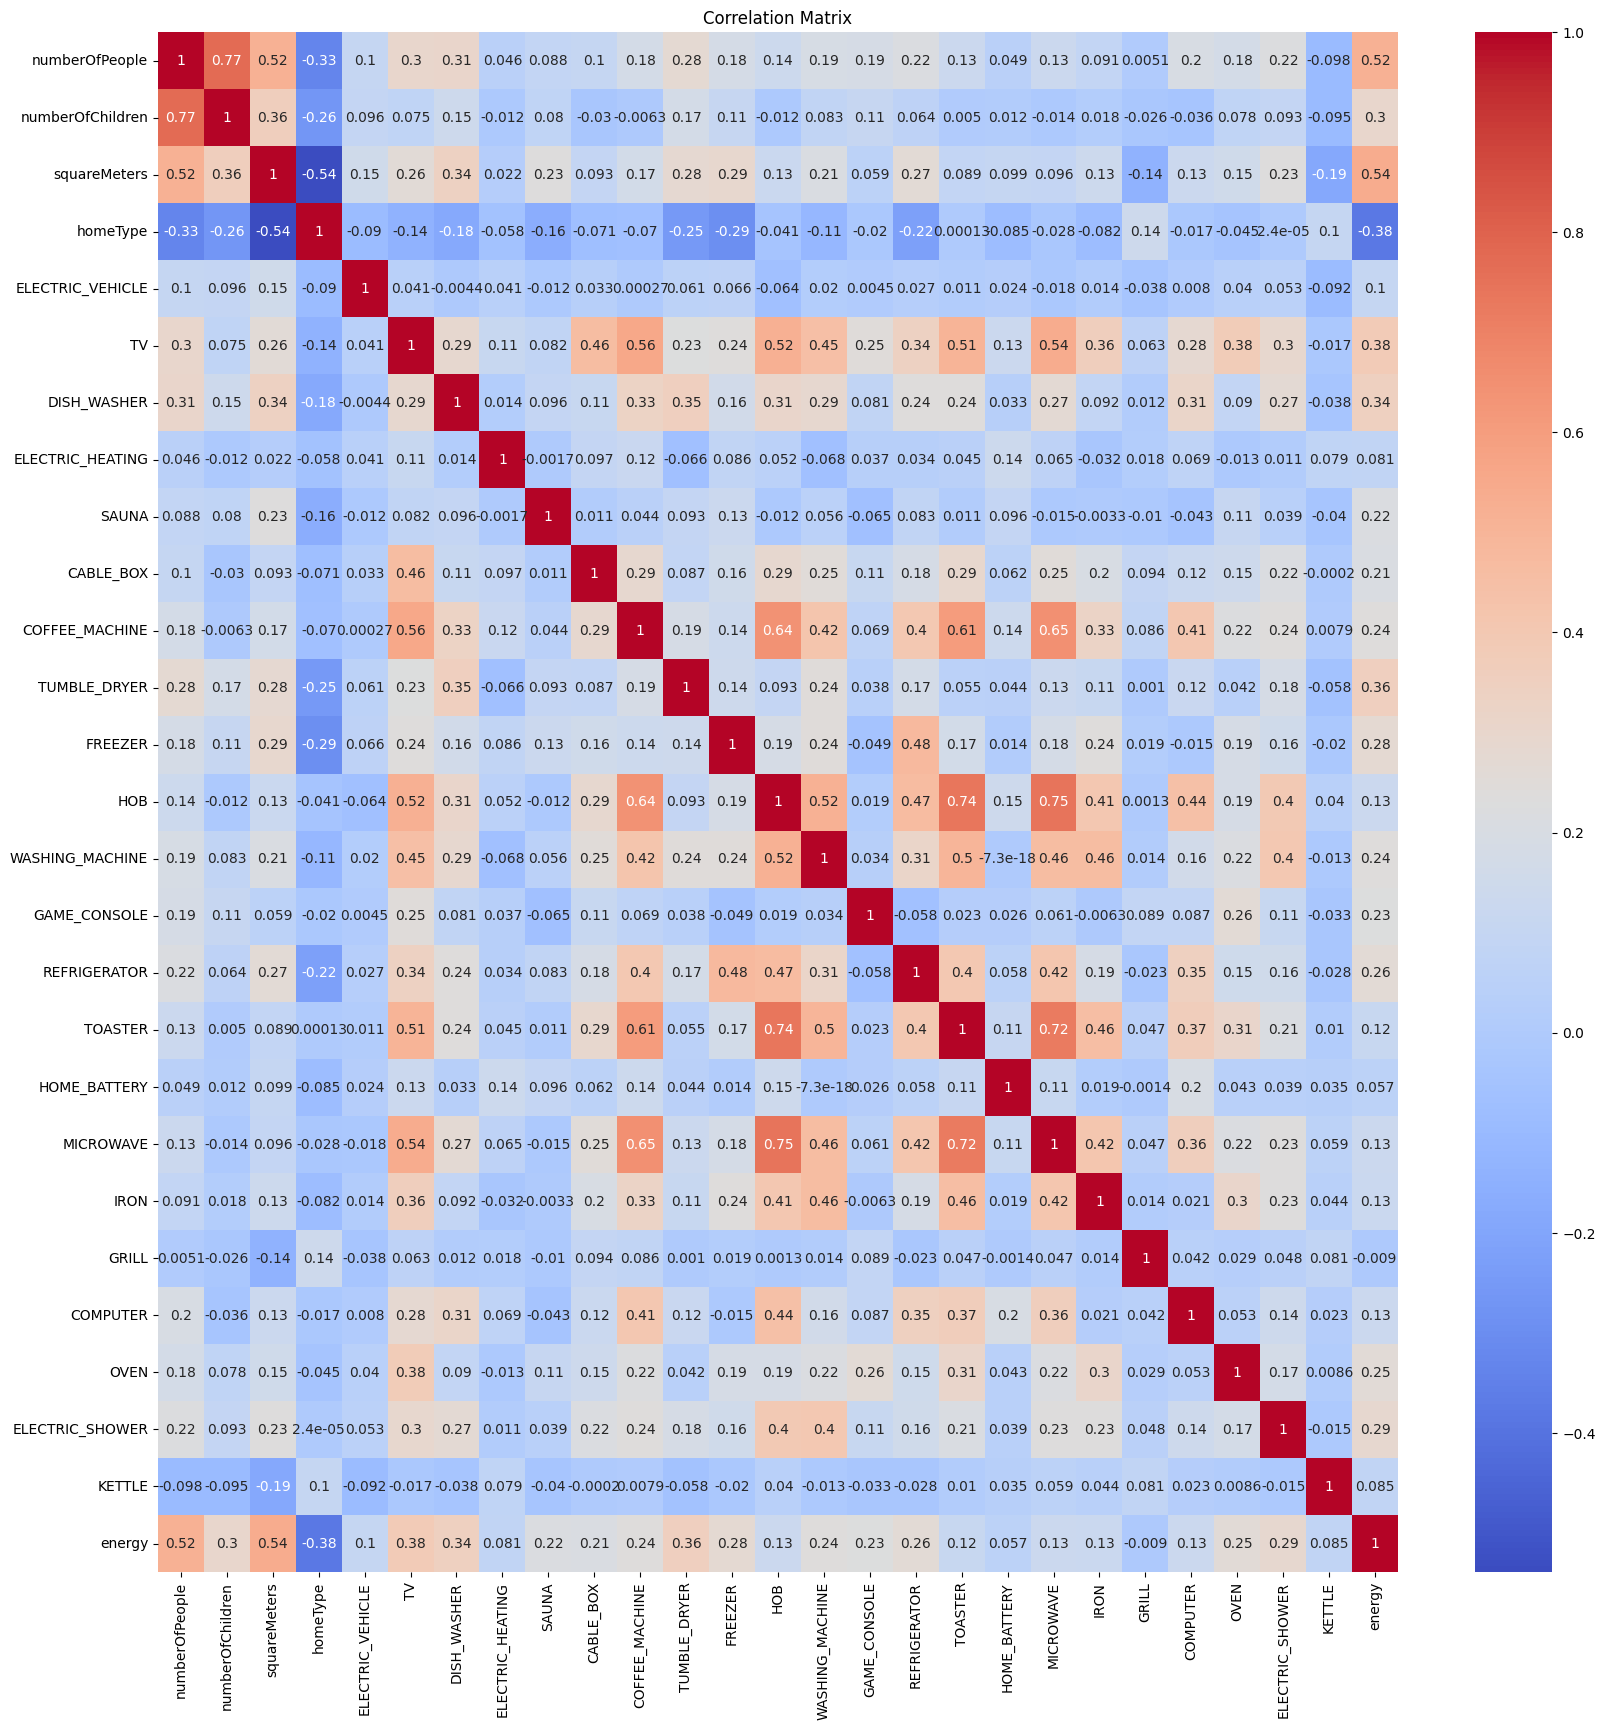

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [143]:
def select_high_correlated_features(data, feature_threshold=0.7, target_threshold=0.2):
    corr_matrix = data.corr()
    rejected_col = set()
    accepted_col = set()
    for i in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, -1]) < target_threshold:
            rejected_col.add(corr_matrix.columns[i])
            continue
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > feature_threshold:
                if abs(corr_matrix.iloc[i, -1]) > abs(corr_matrix.iloc[-1, j]):
                    rejected_col.add(corr_matrix.columns[j])
                    continue
                else:
                    rejected_col.add(corr_matrix.columns[i])
                    continue
        accepted_col.add(corr_matrix.columns[i])
    accepted_col.add('ELECTRIC_VEHICLE')
    rejected_col.discard('ELECTRIC_VEHICLE')
    print(f"Total cols: {len(data.columns)}, Accepted cols: {len(accepted_col)}. Rejected_cols: {len(rejected_col)}")
    return accepted_col, rejected_col

accepted_col, rejected_col = select_high_correlated_features(data)


Total cols: 27, Accepted cols: 18. Rejected_cols: 10


In [144]:
data = data.drop(rejected_col, axis=1)
data.head()

,numberOfPeople,squareMeters,homeType,ELECTRIC_VEHICLE,TV,DISH_WASHER,SAUNA,CABLE_BOX,COFFEE_MACHINE,TUMBLE_DRYER,FREEZER,WASHING_MACHINE,GAME_CONSOLE,REFRIGERATOR,OVEN,ELECTRIC_SHOWER,energy
0,2.0,102.0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,933.178402
1,1.0,54.0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,202.805462
2,1.0,65.0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,456.958548
3,3.0,120.0,0,0,1,1,0,1,0,0,1,1,1,1,1,1,859.969335
4,1.0,70.0,1,0,2,1,0,2,1,0,0,1,1,0,1,1,347.795414


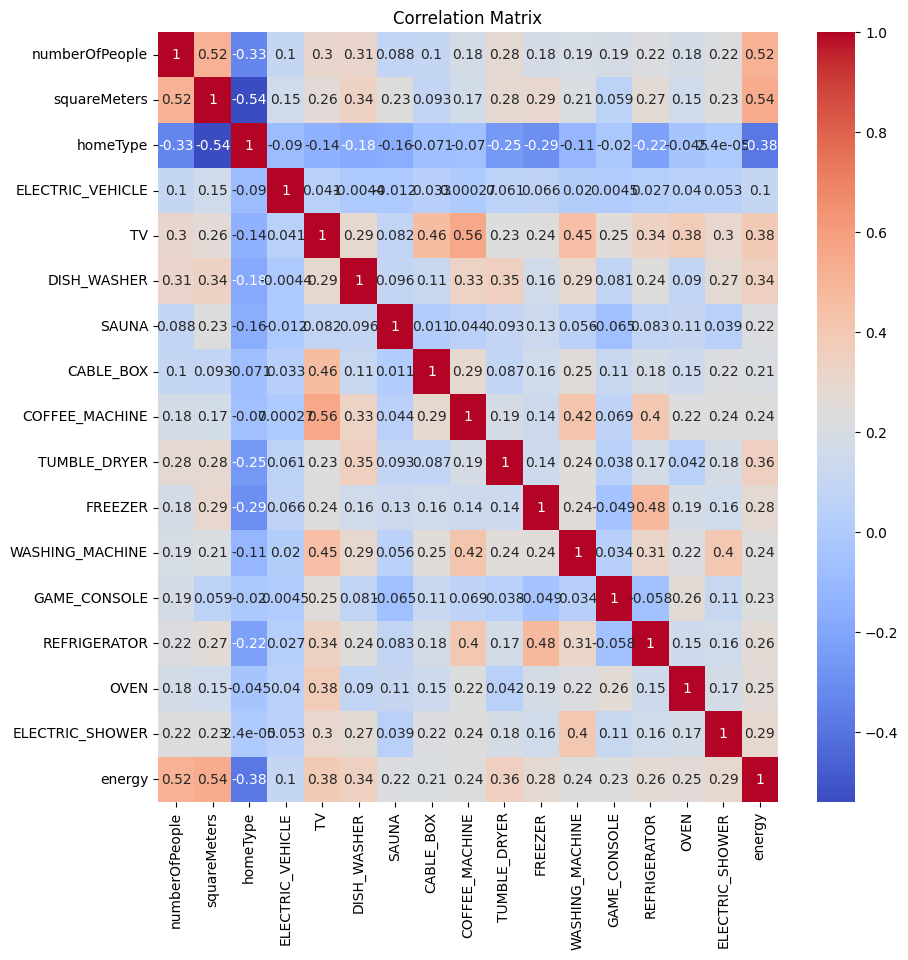

In [145]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

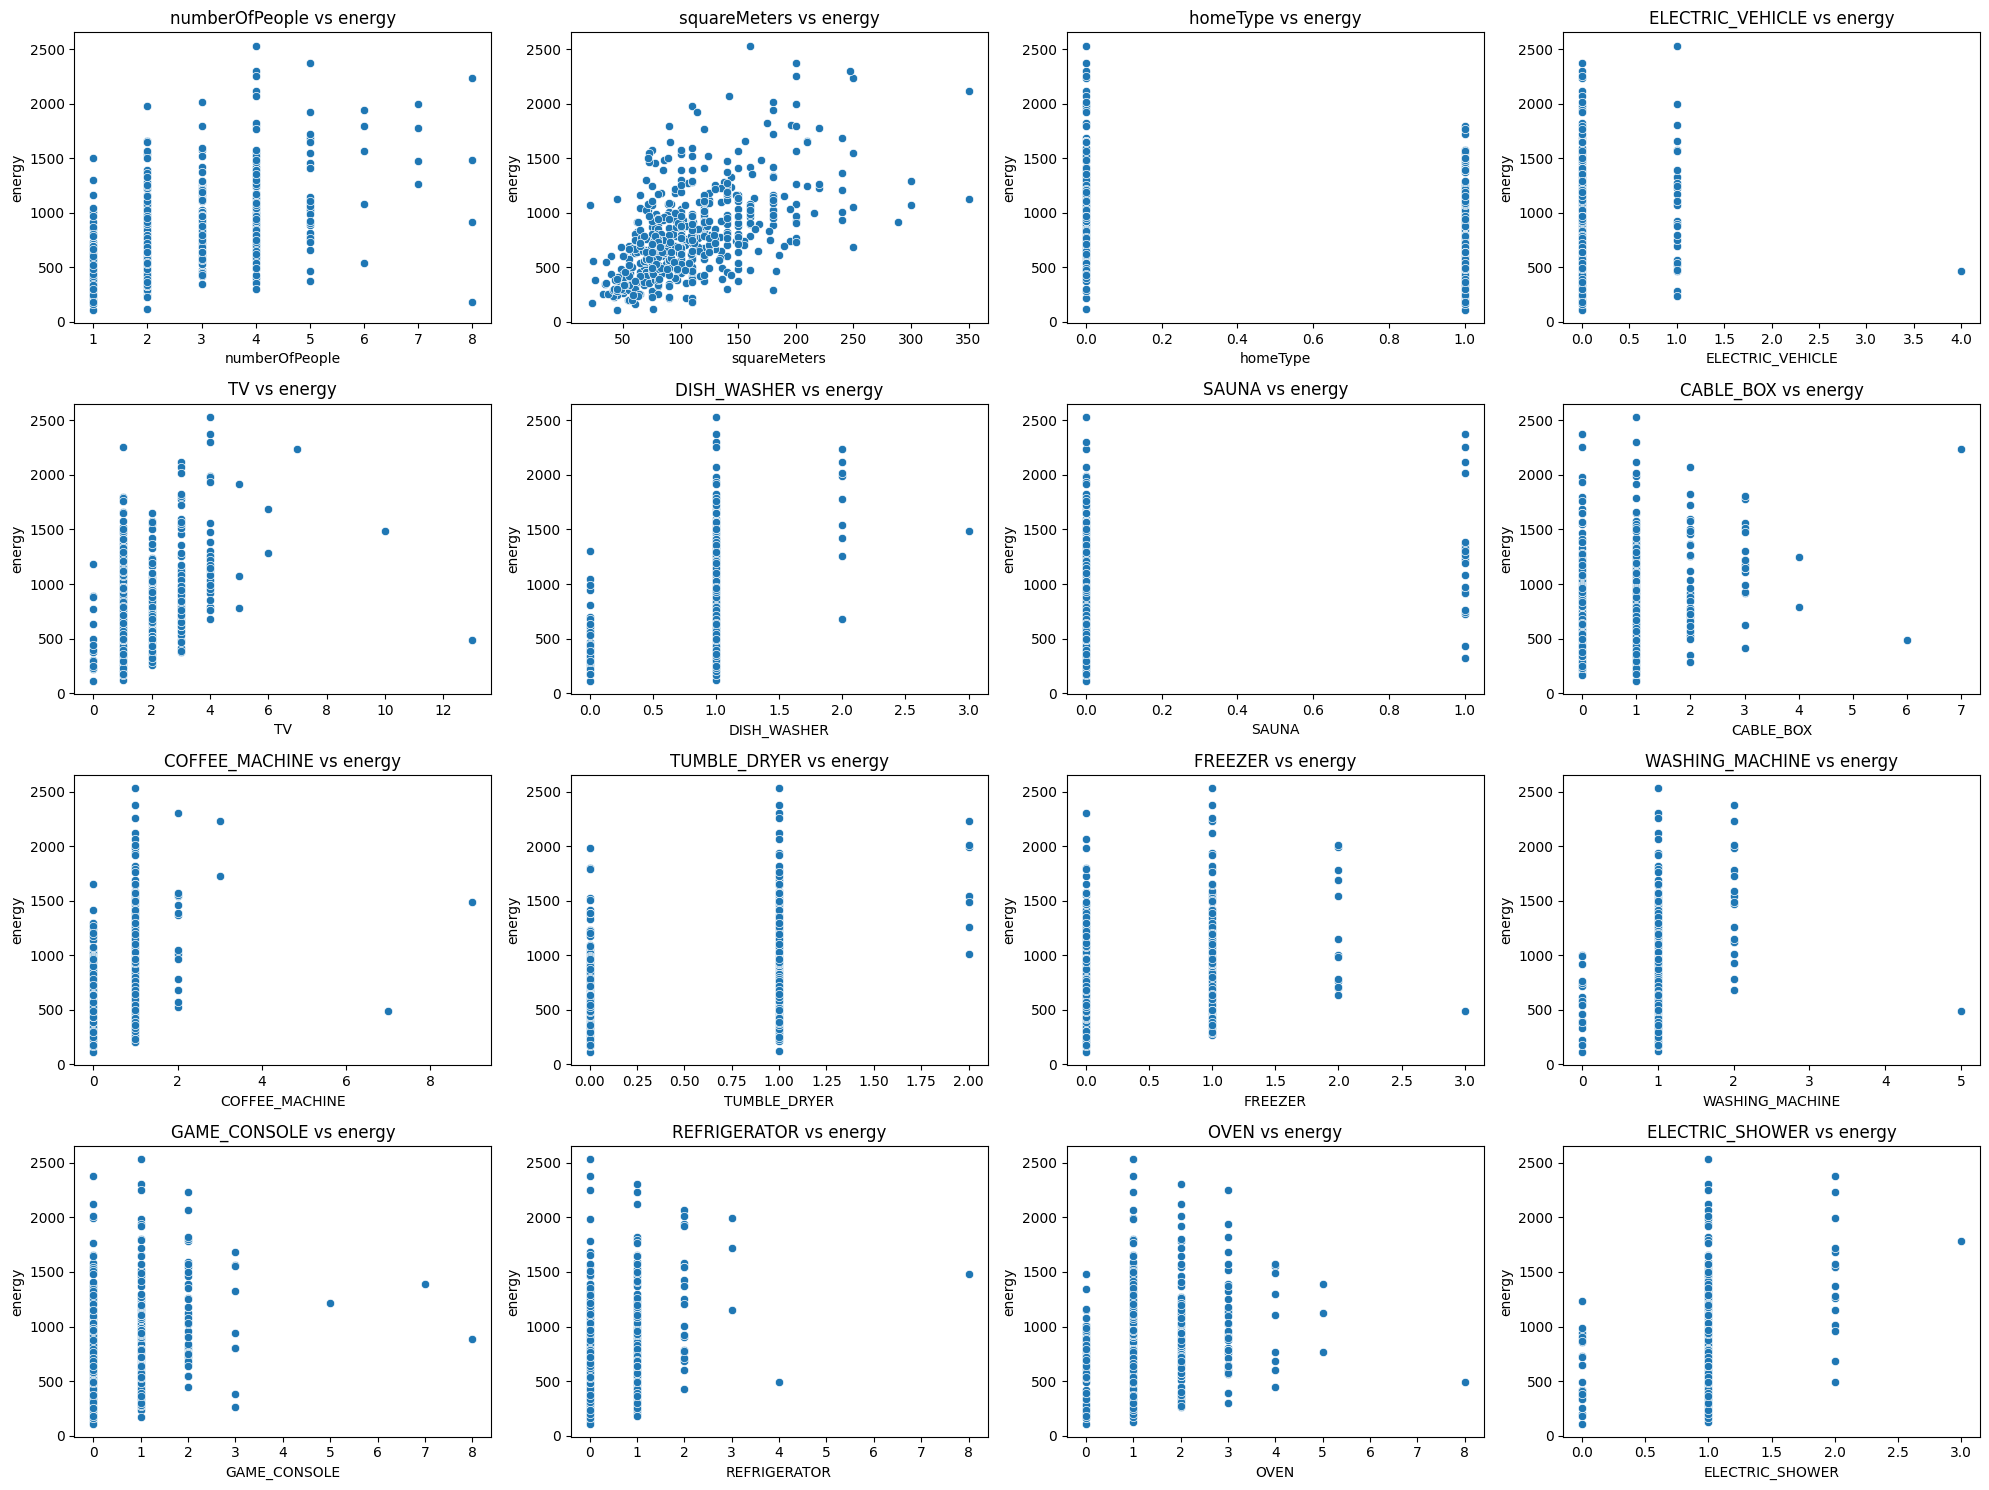

In [146]:
features = data.columns[:-1]

plt.figure(figsize=(20, 15))
for ind, feature in enumerate(features, 1):
    plt.subplot(4, 4, ind)
    sns.scatterplot(x=data[feature], y=data["energy"])
    plt.title(f"{feature} vs energy")
    plt.tight_layout()

plt.show()

In [147]:
data['people_per_sqm'] = data['numberOfPeople'] / data['squareMeters']
data['total_appliances'] = data[['TV', 'DISH_WASHER', 'SAUNA', 'CABLE_BOX', 'COFFEE_MACHINE', 'TUMBLE_DRYER', 'FREEZER', 'WASHING_MACHINE', 'GAME_CONSOLE', 'REFRIGERATOR', 'OVEN', 'ELECTRIC_SHOWER']].sum(axis=1)
data['average_energy_per_appliance'] = data['energy'] / data['total_appliances']
data.head()

,numberOfPeople,squareMeters,homeType,ELECTRIC_VEHICLE,TV,DISH_WASHER,SAUNA,CABLE_BOX,COFFEE_MACHINE,TUMBLE_DRYER,FREEZER,WASHING_MACHINE,GAME_CONSOLE,REFRIGERATOR,OVEN,ELECTRIC_SHOWER,energy,people_per_sqm,total_appliances,average_energy_per_appliance
0,2.0,102.0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,933.178402,0.019608,11,84.834400
1,1.0,54.0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,202.805462,0.018519,5,40.561092
2,1.0,65.0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,456.958548,0.015385,9,50.773172
3,3.0,120.0,0,0,1,1,0,1,0,0,1,1,1,1,1,1,859.969335,0.025000,9,95.552148
4,1.0,70.0,1,0,2,1,0,2,1,0,0,1,1,0,1,1,347.795414,0.014286,10,34.779541


In [148]:
print(len(data))
print(data.nunique())
data.apply(pd.Series.value_counts).head()

553
numberOfPeople                    8
squareMeters                    121
homeType                          2
ELECTRIC_VEHICLE                  3
TV                               10
DISH_WASHER                       4
SAUNA                             2
CABLE_BOX                         7
COFFEE_MACHINE                    6
TUMBLE_DRYER                      3
FREEZER                           4
WASHING_MACHINE                   4
GAME_CONSOLE                      7
REFRIGERATOR                      6
OVEN                              7
ELECTRIC_SHOWER                   4
energy                          551
people_per_sqm                  163
total_appliances                 24
average_energy_per_appliance    553
dtype: int64


,numberOfPeople,squareMeters,homeType,ELECTRIC_VEHICLE,TV,DISH_WASHER,SAUNA,CABLE_BOX,COFFEE_MACHINE,TUMBLE_DRYER,FREEZER,WASHING_MACHINE,GAME_CONSOLE,REFRIGERATOR,OVEN,ELECTRIC_SHOWER,energy,people_per_sqm,total_appliances,average_energy_per_appliance
0.000000,NaN,NaN,221.0,523.0,17.0,41.0,530.0,205.0,133.0,204.0,327.0,23.0,270.0,290.0,73.0,23.0,NaN,NaN,NaN,NaN
0.006667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
0.007353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [149]:
ev_val_cnt = {}
for val, cnt in data['ELECTRIC_VEHICLE'].value_counts().items():
    ev_val_cnt[val] = cnt

print(ev_val_cnt)

{0: 523, 1: 29, 4: 1}


In [150]:
from imblearn.over_sampling import RandomOverSampler

x_temp = data.drop(columns=['ELECTRIC_VEHICLE'])
y_temp = data['ELECTRIC_VEHICLE']

ev_val_cnt[1] = ev_val_cnt[1]*18
ev_val_cnt[4] = ev_val_cnt[4]*18
ros = RandomOverSampler(sampling_strategy=ev_val_cnt, random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_temp, y_temp)

data_resampled = pd.DataFrame(x_resampled, columns=x_temp.columns)
data_resampled['ELECTRIC_VEHICLE'] = y_resampled

print(len(data_resampled))

data = data_resampled
data_resampled.head()


1063


,numberOfPeople,squareMeters,homeType,TV,DISH_WASHER,SAUNA,CABLE_BOX,COFFEE_MACHINE,TUMBLE_DRYER,FREEZER,WASHING_MACHINE,GAME_CONSOLE,REFRIGERATOR,OVEN,ELECTRIC_SHOWER,energy,people_per_sqm,total_appliances,average_energy_per_appliance,ELECTRIC_VEHICLE
0,2.0,102.0,0,1,1,1,1,1,1,0,1,1,1,1,1,933.178402,0.019608,11,84.834400,0
1,1.0,54.0,1,1,1,0,0,0,0,0,1,0,0,1,1,202.805462,0.018519,5,40.561092,0
2,1.0,65.0,1,1,1,0,1,1,0,1,1,0,1,1,1,456.958548,0.015385,9,50.773172,0
3,3.0,120.0,0,1,1,0,1,0,0,1,1,1,1,1,1,859.969335,0.025000,9,95.552148,0
4,1.0,70.0,1,2,1,0,2,1,0,0,1,1,0,1,1,347.795414,0.014286,10,34.779541,0


In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def eval_n_plot(x_data, y_data, model, is_train_data=False):
    y_pred = model.predict(x_data)
    mse = mean_squared_error(y_data, y_pred)
    print(f"MSE: {mse}\tRMSE: {mse ** 0.5}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_data)), y_data, label='Actual Energy Consumption', color='blue', linewidth=2)
    plt.plot(range(len(y_data)), y_pred, label='Predicted Energy Consumption', color='green', linewidth=2)
    plt.xlabel('Index')
    plt.ylabel('Energy Consumption')
    if is_train_data:
        plt.title('Actual vs Predicted (train data)')
    else:
        plt.title('Actual vs Predicted (test data)')
    plt.legend()
    plt.show()

MSE: 6489.301478516374	RMSE: 80.55620074529567


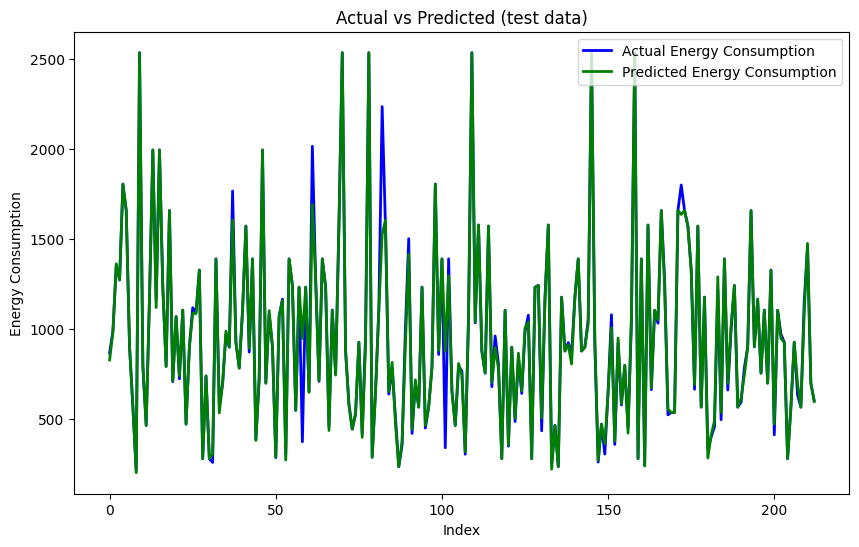

MSE: 0.6752154845898555	RMSE: 0.8217149655384496


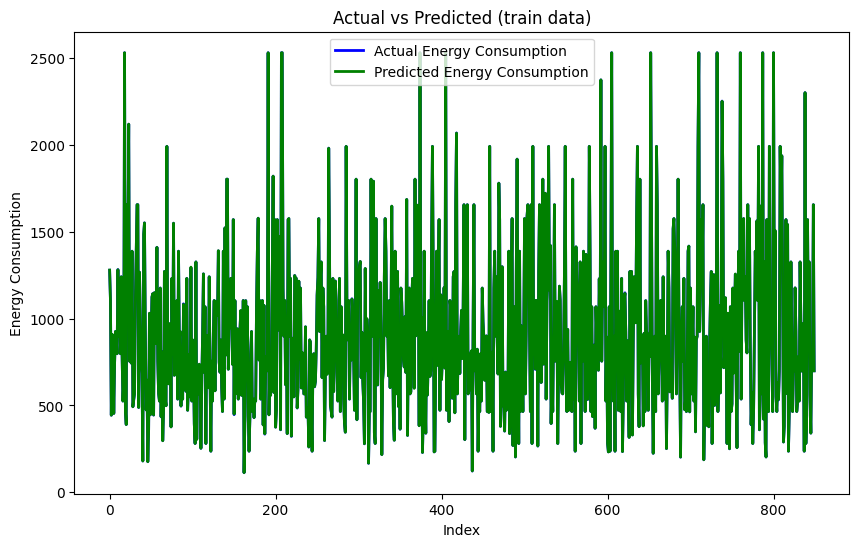

In [152]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x = data.drop('energy', axis=1)
y = data['energy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

base_model.fit(x_train, y_train)
eval_n_plot(x_test, y_test, base_model)
eval_n_plot(x_train, y_train, base_model, is_train_data=True)

In [153]:
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.2, 0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.2, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [154]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
best_xgb = grid_search.best_estimator_

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


MSE: 3612.527676344489	RMSE: 60.10430663724929


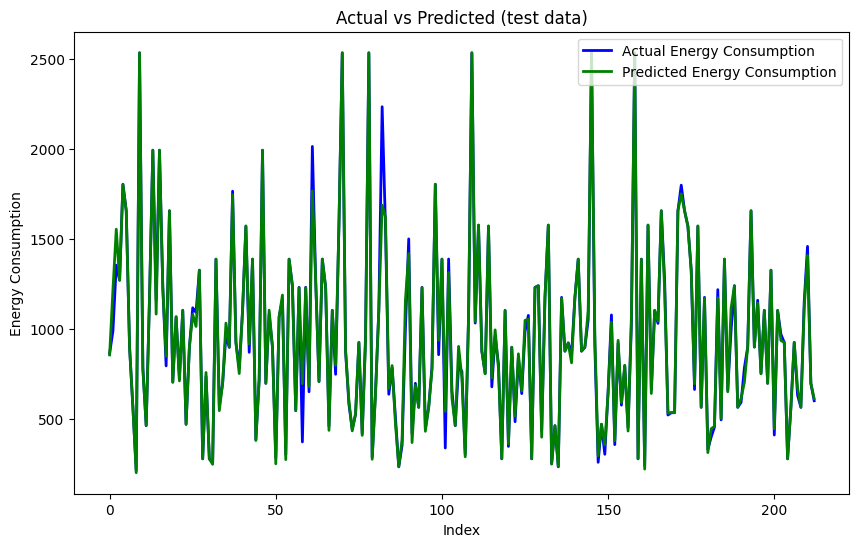

MSE: 108.1821868471016	RMSE: 10.401066620645288


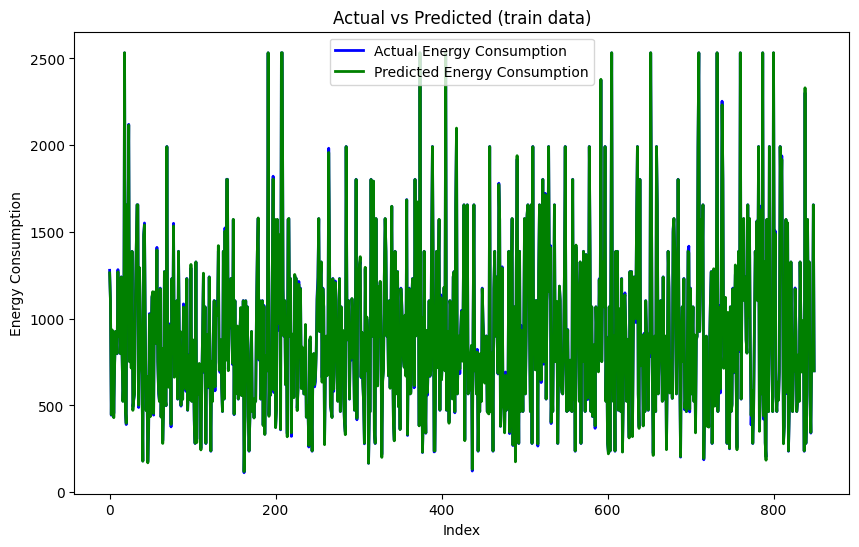

In [155]:
eval_n_plot(x_test, y_test, best_xgb)
eval_n_plot(x_train, y_train, best_xgb, is_train_data=True)